### Visualizing xarray


Lets read the data


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import leafmap

In [2]:
ds = xr.open_dataset("air.mon.mean.nc")
ta = ds["air"]

<xarray.DataArray 'air' (time: 912, lat: 360, lon: 720)>
[236390400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-12-01
Attributes:
    long_name:      Monthly mean of surface temperature
    units:          degK
    dataset:        NOAA/NCEP GHCN CAMS
    var_desc:       Air Temperature
    level_desc:     Surface
    statistic:      Mean
    parent_stat:    Other
    standard_name:  air_temperature
    cell_methods:   time: mean
    valid_range:    [150. 400.]
    actual_range:   [-49.21874 335.75   ]

### One dimensional plot


We can simply use the `plot()` method to plot the data.


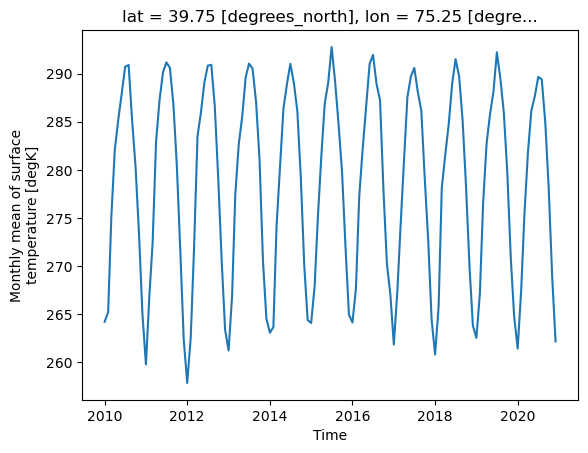

In [16]:
ta.sel(time=slice("2010-01-01", "2020-12-31")).isel(lat=100, lon=150).plot()

xarray under the hood used the `matplotlib` library. Any argument that goes into matplotlib can be passed to xarray


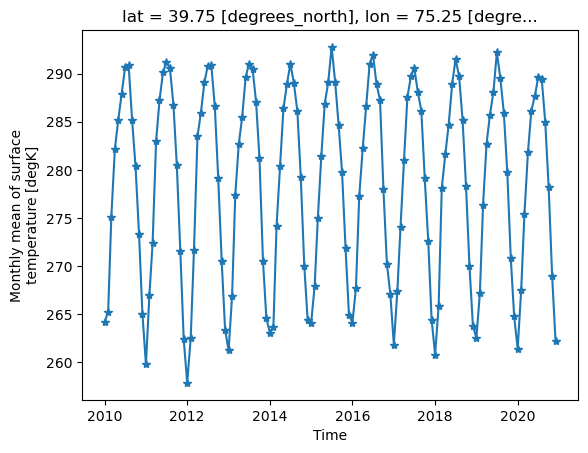

In [20]:
ta.sel(time=slice("2010-01-01", "2020-12-31")).isel(lat=100, lon=150).plot.line("-*")

### Controls on the figure


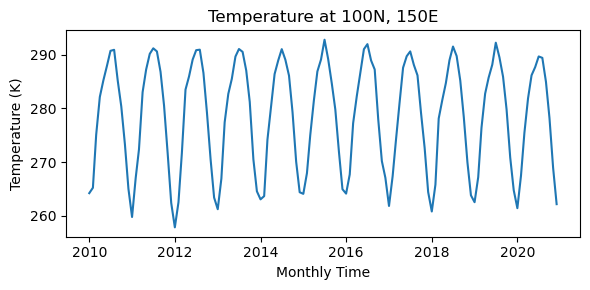

In [27]:
ta.sel(time=slice("2010-01-01", "2020-12-31")).isel(lat=100, lon=150).plot(
    aspect=2, size=3
)
plt.title("Temperature at 100N, 150E")
plt.xlabel("Monthly Time")
plt.ylabel("Temperature (K)")
plt.tight_layout()

Overlaying Plots¶


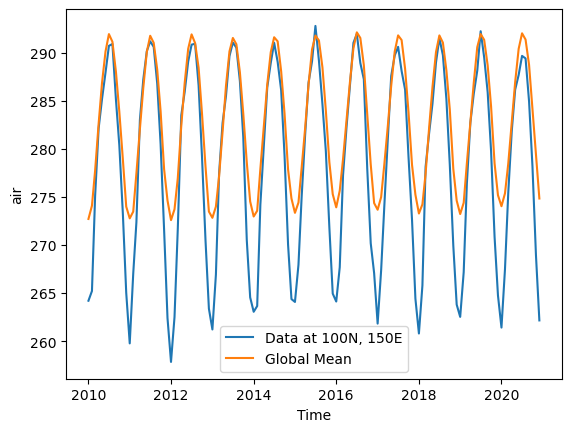

In [38]:
data1 = ta.sel(time=slice("2010-01-01", "2020-12-31")).isel(lat=100, lon=150)
data2 = ta.sel(time=slice("2010-01-01", "2020-12-31")).mean(["lat", "lon"])
fig, ax = plt.subplots()

# Plot data1 on the axes
data1.plot(ax=ax, label="data1")

# Overlay data2 on the same axes
data2.plot(ax=ax, label="data2")

plt.legend(["Data at 100N, 150E", "Global Mean"])

### Two dimensional plots


Text(0, 0.5, 'Latitude')

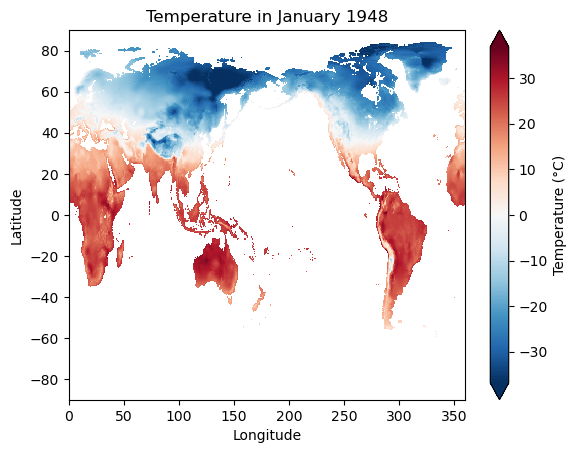

In [46]:
(ta.isel(time=0) - 273.15).plot(robust=True, cbar_kwargs={"label": "Temperature (°C)"})
plt.title("Temperature in January 1948")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

### Faceting

Its handy when we want to plot multiple plots along a dimension (e.g. time)


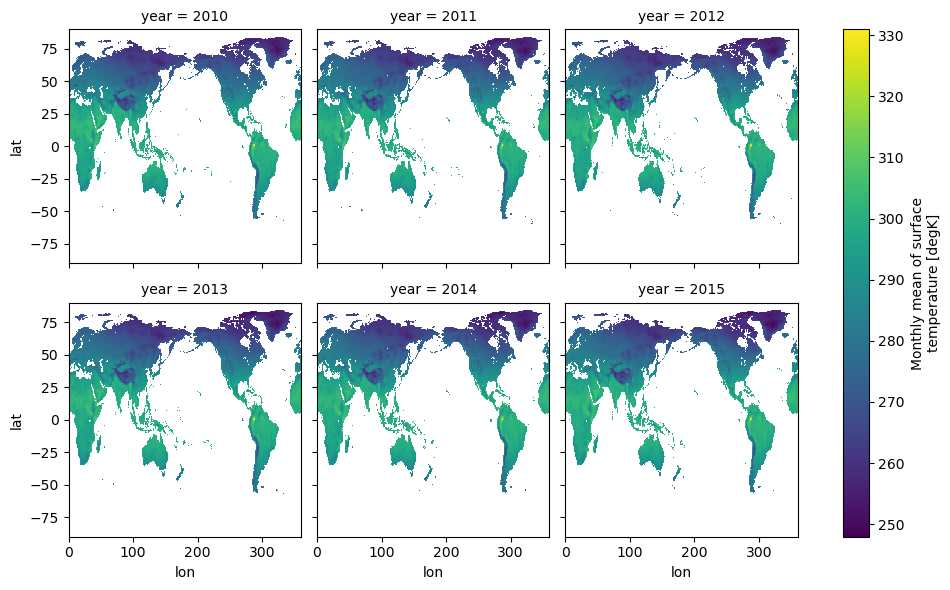

In [61]:
ta_sub = ta.sel(time=slice("2010-01-01", "2015-12-31"))
ta_sub_mean = ta_sub.groupby("time.year").mean("time")
ta_sub_mean.plot(col="year", col_wrap=3)